 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns:

whale_returns_data = Path("./Resources/whale_returns.csv")

whale_returns_df = pd.read_csv(whale_returns_data)

# Setup collumns:

whale_returns_df.columns = ["Date", "Soros_Fund", "Paulson_Fund", "Tiger_Global_Fund", "Berkshire_Fund"]

# Set CSV to a dataframe:

whale_returns_df.set_index(pd.to_datetime(whale_returns_df["Date"], infer_datetime_format = True), inplace = True)

# Drop dups and index the date column:

whale_returns_df.drop(columns = ["Date"], inplace = True)

# Check for nulls values

print(f"Null values for Whale Returns:\n{whale_returns_df.isnull().sum()}")

Null values for Whale Returns:
Soros_Fund           1
Paulson_Fund         1
Tiger_Global_Fund    1
Berkshire_Fund       1
dtype: int64


In [4]:
# Drop nulls values:

whale_returns_df.dropna(inplace = True)
print(f"Dropped null values for Whale Returns:\n{whale_returns_df.isnull().sum()}")

Dropped null values for Whale Returns:
Soros_Fund           0
Paulson_Fund         0
Tiger_Global_Fund    0
Berkshire_Fund       0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Read in algorithmic returns:

algo_returns_data = Path("./Resources/algo_returns.csv")

algo_returns_df = pd.read_csv(algo_returns_data)

# Setup collumns:

algo_returns_df.columns = ['Date', 'Algo1', 'Algo2',]

# Setup index:

algo_returns_df.set_index(pd.to_datetime(algo_returns_df["Date"], infer_datetime_format = True), inplace = True)

# Drop dups:

algo_returns_df.drop(columns = ["Date"], inplace = True)

# Check for nulls:

print(f"Null values for Algo returns:\n{algo_returns_df.isnull().sum()}")

Null values for Algo returns:
Algo1    0
Algo2    6
dtype: int64


In [6]:
# Drop nulls values:

algo_returns_df.dropna(inplace = True)
print(f"Dropped null vales for Algo returns:\n{algo_returns_df.isnull().sum()}")

Dropped null vales for Algo returns:
Algo1    0
Algo2    0
dtype: int64


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [7]:
# Reading S&P 500 Closing Prices:

sp500_history_data = Path("./Resources/sp500_history.csv")

sp500_history_df = pd.read_csv(sp500_history_data)

In [8]:
# Check Data Types:

print(f"{sp500_history_df.dtypes}\n")

Date     object
Close    object
dtype: object



In [9]:
# Fix Data Types and set the column names:

sp500_history_df.columns = ["Date", "sp500"]

In [10]:
# Calculate Daily Returns:
# Set index:

sp500_history_df.set_index(pd.to_datetime(sp500_history_df["Date"], infer_datetime_format = True), inplace = True)

sp500_history_df.sort_index(inplace = True, ascending = True)

#Drop dups

sp500_history_df.drop(columns = ["Date"], inplace = True)

In [11]:
# Check / Drop nulls / Print

sp500_history_df.head()

,sp500
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Rename `Close` Column to be specific to this portfolio.

print(sp500_history_df.head())

# Show / Remove $ sign:

def remove_dollar_sign(sign):
    if isinstance(sign, str):
        return(sign.replace("$", " "))
    return(sign)

sp500_history_df["sp500"] = sp500_history_df["sp500"].apply(remove_dollar_sign).astype("float")

print(sp500_history_df.head())

               sp500
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
              sp500
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93


In [13]:
sp500_returns_df = sp500_history_df.pct_change()
print(sp500_returns_df.head())

#sp500_returns_cumulative_df = (1 + sp500_returns_df).cumprod()
#sp500_returns_cumulative_df.plot()

               sp500
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.


combined_returns_df = pd.concat([sp500_returns_df, whale_returns_df, algo_returns_df], axis = "columns", join = "inner")

print(combined_returns_df.head(5))


               sp500  Soros_Fund  Paulson_Fund  Tiger_Global_Fund  \
Date                                                                
2015-03-03 -0.004539   -0.001266     -0.004981          -0.000496   
2015-03-04 -0.004389    0.002230      0.003241          -0.002534   
2015-03-05  0.001196    0.004016      0.004076           0.002355   
2015-03-06 -0.014174   -0.007905     -0.003574          -0.008481   
2015-03-09  0.003944    0.000582      0.004225           0.005843   

            Berkshire_Fund     Algo1     Algo2  
Date                                            
2015-03-03       -0.006569 -0.001942 -0.000949  
2015-03-04        0.004213 -0.008589  0.002416  
2015-03-05        0.006726 -0.000955  0.004323  
2015-03-06       -0.013098 -0.004957 -0.011460  
2015-03-09       -0.001652 -0.005447  0.001303  


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns for Whales, Algo, S&P 500'}, xlabel='Date', ylabel='Daily Returns'>

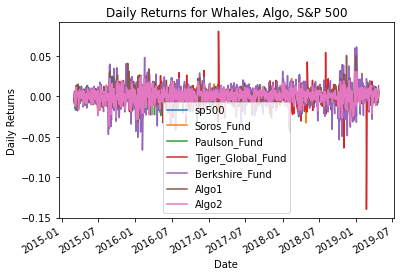

In [15]:
# Plot daily returns of all portfolios

combined_returns_df.plot(xlabel = "Date", ylabel = "Daily Returns", title = "Daily Returns for Whales, Algo, S&P 500")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for Whales, Algo, S&P 500'}, xlabel='Date', ylabel='Cumulative Returns'>

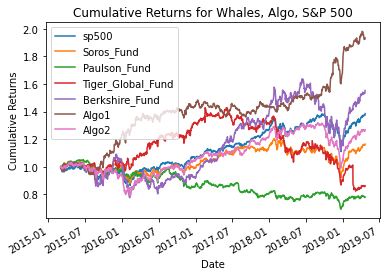

In [16]:
# Calculate cumulative returns of all portfolios

cumulative_returns_df = (1 + combined_returns_df).cumprod()

# Plot cumulative returns

cumulative_returns_df.plot(xlabel = "Date", ylabel = "Cumulative Returns", title = "Cumulative Returns for Whales, Algo, S&P 500")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


Text(0.5, 1.0, 'Statistics')

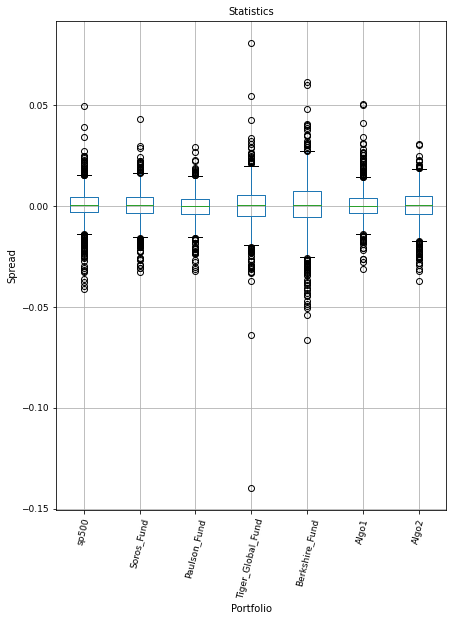

In [17]:
# Box plot to visually show risk
box_plot = ["sp500", "Soros_Fund", "Paulson_Fund", "Tiger_Global_Fund", "Berkshire_Fund", "Algo1", "Algo2"]

ax = combined_returns_df.boxplot(column = box_plot, fontsize = 9, figsize = (7, 9), rot = 76)

ax.set_ylabel("Spread", fontsize = 10)
ax.set_xlabel("Portfolio", fontsize = 10)
ax.set_title("Statistics", fontsize = 10)

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios

volatility = cumulative_returns_df.std()

print(f"Volatility of the whole portfolio:\n\n{(volatility)}")

Volatility of the whole portfolio:

sp500                0.144448
Soros_Fund           0.073238
Paulson_Fund         0.088455
Tiger_Global_Fund    0.149844
Berkshire_Fund       0.241575
Algo1                0.232277
Algo2                0.131700
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500:

volatility_sp500 = volatility[0]

volatility_soros_fund = volatility[1]

volatility_paulson_fund = volatility[2]

volatility_tiger_global = volatility[3]

volatility_berkshaire_fund = volatility[4]

volatility_algo_1 = volatility[5]

volatility_algo_2 = volatility[6]

# print out the funds:

print(f"Volatility of S&P500: {volatility_sp500}")
print(f"Volatility of Soros Fund: {volatility_soros_fund}")
print(f"Volatility of Paulson Fund: {volatility_paulson_fund}")
print(f"Volatility of Tiger Global: {volatility_tiger_global}")
print(f"Volatility of Berkshire Hathaway: {volatility_berkshaire_fund}")
print(f"Volatility of Algo 1: {volatility_algo_1}")
print(f"Volatility of Algo 2: {volatility_algo_2}")

# Determine which portfolios are riskier than the S&P 500:

print()
print(f"The most volatile funds are: Tiger Golbal, Berkshire Hathaway, Algo 1")

Volatility of S&P500: 0.14444769967610394
Volatility of Soros Fund: 0.0732381791816174
Volatility of Paulson Fund: 0.08845503752573346
Volatility of Tiger Global: 0.14984442474431858
Volatility of Berkshire Hathaway: 0.24157462880056535
Volatility of Algo 1: 0.23227714752452805
Volatility of Algo 2: 0.13170033061807573

The most volatile funds are: Tiger Golbal, Berkshire Hathaway, Algo 1


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)

volatility_annual = cumulative_returns_df.std() * np.sqrt(252)

volatility_annual_sp500 = volatility_annual[0]

volatility_annual_soros_fund = volatility_annual[1]

volatility_annual_paulson_fund = volatility_annual[2]

volatility_annual_tiger_global = volatility_annual[3]

volatility_annual_berkshaire_fund = volatility_annual[4]

volatility_annual_algo_1 = volatility_annual[5]

volatility_annual_algo_2 = volatility_annual[6]

# print funds

print(f"Volatility of S&P500: {volatility_annual_sp500}")
print(f"Volatility of Soros Fund: {volatility_annual_soros_fund}")
print(f"Volatility of Paulson Fund: {volatility_annual_paulson_fund}")
print(f"Volatility of Tiger Global: {volatility_annual_tiger_global}")
print(f"Volatility of Berkshire Hathaway: {volatility_annual_berkshaire_fund}")
print(f"Volatility of Algo 1: {volatility_annual_algo_1}")
print(f"Volatility of Algo 2: {volatility_annual_algo_2}")

Volatility of S&P500: 2.2930361447898973
Volatility of Soros Fund: 1.162620051538486
Volatility of Paulson Fund: 1.4041801890238612
Volatility of Tiger Global: 2.378706499338002
Volatility of Berkshire Hathaway: 3.8348783452142254
Volatility of Algo 1: 3.6872854055601807
Volatility of Algo 2: 2.0906779344024837


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD for Whales, Algo, SP500'}, xlabel='Date', ylabel='21 Day Rolling STD'>

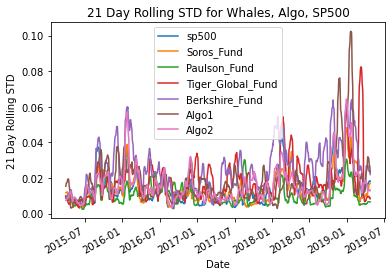

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation for 21 days

cumulative_returns_df.rolling(window = 21).std().plot(xlabel = "Date", ylabel = "21 Day Rolling STD", title = "21 Day Rolling STD for Whales, Algo, SP500")

### Calculate and plot the correlation

In [22]:
# Calculate the correlation

correlation = combined_returns_df.corr()

print(f"Correlation of Whales, SP500{correlation}")

# Display the correlation matrix

correlation

Correlation of Whales, SP500                      sp500  Soros_Fund  Paulson_Fund  Tiger_Global_Fund  \
sp500              1.000000    0.837864      0.669732           0.623946   
Soros_Fund         0.837864    1.000000      0.699914           0.561243   
Paulson_Fund       0.669732    0.699914      1.000000           0.434479   
Tiger_Global_Fund  0.623946    0.561243      0.434479           1.000000   
Berkshire_Fund     0.751371    0.754360      0.545623           0.424423   
Algo1              0.279494    0.321211      0.268840           0.164387   
Algo2              0.858764    0.826873      0.678152           0.507414   

                   Berkshire_Fund     Algo1     Algo2  
sp500                    0.751371  0.279494  0.858764  
Soros_Fund               0.754360  0.321211  0.826873  
Paulson_Fund             0.545623  0.268840  0.678152  
Tiger_Global_Fund        0.424423  0.164387  0.507414  
Berkshire_Fund           1.000000  0.292033  0.688082  
Algo1                    0.

,sp500,Soros_Fund,Paulson_Fund,Tiger_Global_Fund,Berkshire_Fund,Algo1,Algo2
sp500,1.000000,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764
Soros_Fund,0.837864,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
Paulson_Fund,0.669732,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
Tiger_Global_Fund,0.623946,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
Berkshire_Fund,0.751371,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo1,0.279494,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo2,0.858764,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Coveriance for Soros Fund: 0.009262121816538899
Coveriance for Paulson Fund: -0.01090146294893855
Coveriance for Tiger Global: 0.0028483321292909355
Coveriance for Berkshire Hathaway: 0.0327504631521064
Coveriance for Algo 1: 0.024835616826725894
Coveriance for Algo 2: 0.018374787698481547
Covariance of SP500: 0.020865137941717918
Beta of Soros Fund: (0.4439041736704813, 7)
Beta of Paulson Fund: (-0.5224726037943933, 7)
Beta of Tiger Global: (0.1365115407934092, 7)
Beta of Berkshire Hathaway: (1.569626006958951, 7)
Beta of Algo 1: (1.1902924819427803, 7)
Beta of Algo 2: (0.8806453975913026, 7)


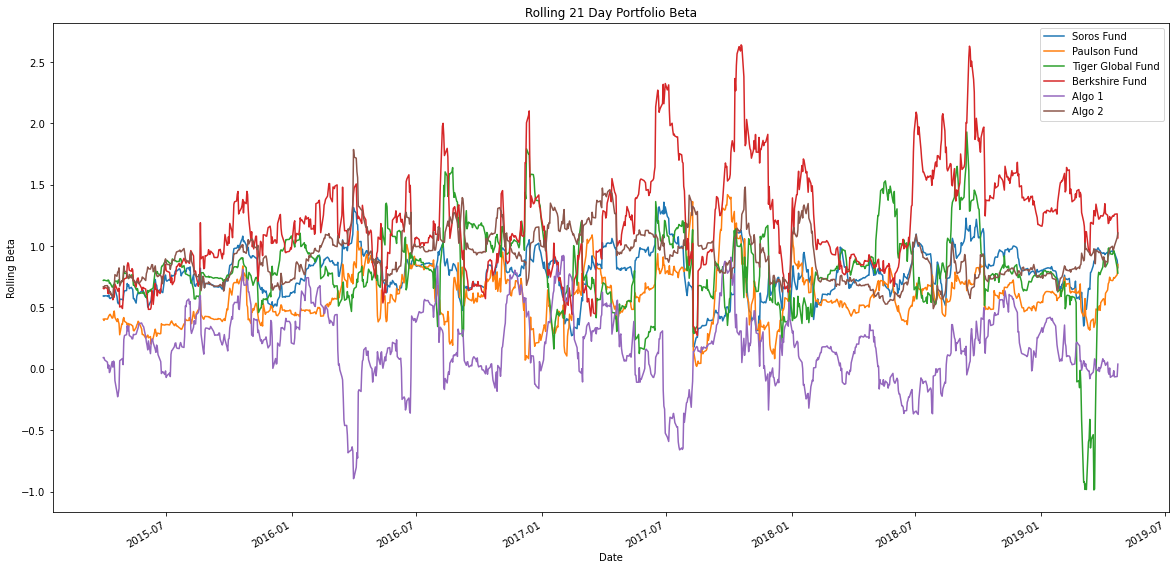

In [23]:
# Calculate covariance of a single portfolio

coveriance_soros_fund = cumulative_returns_df["Soros_Fund"].cov(cumulative_returns_df["sp500"])
coveriance_paulson_fund = cumulative_returns_df["Paulson_Fund"].cov(cumulative_returns_df["sp500"])
coveriance_tiger_global = cumulative_returns_df["Tiger_Global_Fund"].cov(cumulative_returns_df["sp500"])
coveriance_berkshire_fund = cumulative_returns_df["Berkshire_Fund"].cov(cumulative_returns_df["sp500"])
coveriance_algo_1 = cumulative_returns_df["Algo1"].cov(cumulative_returns_df["sp500"])
coveriance_algo_2 = cumulative_returns_df["Algo2"].cov(cumulative_returns_df["sp500"])

print(f"Coveriance for Soros Fund: {coveriance_soros_fund}")
print(f"Coveriance for Paulson Fund: {coveriance_paulson_fund}")
print(f"Coveriance for Tiger Global: {coveriance_tiger_global}")
print(f"Coveriance for Berkshire Hathaway: {coveriance_berkshire_fund}")
print(f"Coveriance for Algo 1: {coveriance_algo_1}")
print(f"Coveriance for Algo 2: {coveriance_algo_2}")

# Calculate variance of S&P 500

variance = cumulative_returns_df["sp500"].var()
print(f"Covariance of SP500: {variance}")

# Computing beta for all funds

soros_fund_beta = coveriance_soros_fund / variance
paulson_fund_beta = coveriance_paulson_fund / variance
tiger_global_beta = coveriance_tiger_global / variance
berkshire_fund_beta = coveriance_berkshire_fund / variance
algo1_fund_beta = coveriance_algo_1 / variance
algo2_fund_beta = coveriance_algo_2 / variance

print(f"Beta of Soros Fund: {(soros_fund_beta, 7)}")
print(f"Beta of Paulson Fund: {(paulson_fund_beta, 7)}")
print(f"Beta of Tiger Global: {(tiger_global_beta, 7)}")
print(f"Beta of Berkshire Hathaway: {(berkshire_fund_beta, 7)}")
print(f"Beta of Algo 1: {(algo1_fund_beta, 7)}")
print(f"Beta of Algo 2: {(algo2_fund_beta, 7)}")

# Plot beta trend

portfolio = ["soros_fund", "paulson_fund", "tiger_global_fund", "berkshaire_fund", "algo_1", "algo_2"]
beta = [soros_fund_beta, paulson_fund_beta, tiger_global_beta, berkshire_fund_beta, algo1_fund_beta, algo2_fund_beta]

#plt.figure(figsize = (10, 3))
#plt.bar(portfolio, beta)
#plt.show()

#plt.figure(figsize = (10, 7))
#plt.bar(portfolio, beta)
#plt.xlabel("Portfolio")
#plt.ylabel("Beta")
#plt.grid()
#plt.title("Beta for the Portfolio")
#plt.show()

rolling_covariance_soros_fund = combined_returns_df["Soros_Fund"].rolling(window=21).cov(combined_returns_df["sp500"])
rolling_covariance_paulson_fund = combined_returns_df["Paulson_Fund"].rolling(window=21).cov(combined_returns_df["sp500"])
rolling_covariance_tiger_global_fund = combined_returns_df["Tiger_Global_Fund"].rolling(window=21).cov(combined_returns_df["sp500"])
rolling_covariance_berkshire_fund = combined_returns_df["Berkshire_Fund"].rolling(window=21).cov(combined_returns_df["sp500"])
rolling_covariance_algo1 = combined_returns_df["Algo1"].rolling(window=21).cov(combined_returns_df["sp500"])
rolling_covariance_algo2 = combined_returns_df["Algo2"].rolling(window=21).cov(combined_returns_df["sp500"])

# SP500 Rolling 

rolling_variance_sp500 = combined_returns_df["sp500"].rolling(window=21).var()

rolling_beta_soros_fund = rolling_covariance_soros_fund / rolling_variance_sp500
rolling_beta_paulson_fund = rolling_covariance_paulson_fund / rolling_variance_sp500
rolling_beta_tiger_global_fund = rolling_covariance_tiger_global_fund / rolling_variance_sp500
rolling_beta_berkshire_fund = rolling_covariance_berkshire_fund / rolling_variance_sp500
rolling_beta_algo_1 = rolling_covariance_algo1 / rolling_variance_sp500
rolling_beta_algo_2 = rolling_covariance_algo2 / rolling_variance_sp500

# Plot funds

ax = rolling_beta_soros_fund.plot(figsize=(20,10))
rolling_beta_paulson_fund.plot(ax=ax)
rolling_beta_tiger_global_fund.plot(ax=ax)
rolling_beta_berkshire_fund.plot(ax=ax)
rolling_beta_algo_1.plot(ax=ax)
rolling_beta_algo_2.plot(ax=ax)

# Set lables and axis

ax.set_ylabel("Rolling Beta")
ax.set_xlabel("Date")
ax.set_title("Rolling 21 Day Portfolio Beta")
ax.legend(["Soros Fund", "Paulson Fund", "Tiger Global Fund", "Berkshire Fund", "Algo 1", "Algo 2"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [24]:
# Use `ewm` to calculate the rolling window

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios

sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
print(f"Sharpe Ratio of the entire Portfolio:\n{sharpe_ratios}")

Sharpe Ratio of the entire Portfolio:
sp500                0.648267
Soros_Fund           0.356417
Paulson_Fund        -0.483570
Tiger_Global_Fund   -0.121060
Berkshire_Fund       0.621810
Algo1                1.378648
Algo2                0.501364
dtype: float64


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

# Algo_1 out preforms both the SP500 and the whale portfolio !

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [26]:
# Reading data from 1st stock

aapl_historical_data = Path("./Resources/aapl_historical.csv")

# read dataframe

aapl_historical_df = pd.read_csv(aapl_historical_data)

# set columns

aapl_historical_df.columns = ["Symbol", "Date", "AAPL"]

# set index

aapl_historical_df.set_index(pd.to_datetime(aapl_historical_df["Date"], infer_datetime_format = True), inplace = True)

# Drop dups:

aapl_historical_df.drop(columns = ["Symbol", "Date"], inplace = True)

# ascending order

aapl_historical_df.sort_index(inplace = True, ascending = True)

# check for null values:
print(f"Null values for AAPL: {aapl_historical_df.isnull().sum()}")
print(aapl_historical_df.head(5))

Null values for AAPL: AAPL    0
dtype: int64
              AAPL
Date              
2018-05-11  188.59
2018-05-14  188.15
2018-05-15  186.44
2018-05-16  188.18
2018-05-17  186.99


In [27]:
# Reading data from 2nd stock

cost_historical_data = Path("./Resources/cost_historical.csv")

# read dataframe

cost_historical_df = pd.read_csv(cost_historical_data)

# set columns

cost_historical_df.columns = ["Symbol", "Date", "COST"]

# set index

cost_historical_df.set_index(pd.to_datetime(cost_historical_df["Date"], infer_datetime_format = True), inplace = True)

# Drop dups:

cost_historical_df.drop(columns = ["Symbol", "Date"], inplace = True)

# ascending order

cost_historical_df.sort_index(inplace = True, ascending = True)

# check for null values:
print(f"Null values for COST: {cost_historical_df.isnull().sum()}")
print(cost_historical_df.head(5))

Null values for COST: COST    0
dtype: int64
              COST
Date              
2018-05-11  195.76
2018-05-14  195.88
2018-05-15  195.48
2018-05-16  198.71
2018-05-17  199.60


In [28]:
# Reading data from 3rd stock

goog_historical_data = Path("./Resources/goog_historical.csv")

# read dataframe

goog_historical_df = pd.read_csv(goog_historical_data)

# set columns

goog_historical_df.columns = ["Symbol", "Date", "GOOG"]

# set index

goog_historical_df.set_index(pd.to_datetime(goog_historical_df["Date"], infer_datetime_format = True), inplace = True)

# Drop dups:

goog_historical_df.drop(columns = ["Symbol", "Date"], inplace = True)

# ascending order

goog_historical_df.sort_index(inplace = True, ascending = True)

# check for null values:
print(f"Null values for GOOG: {goog_historical_df.isnull().sum()}")
print(goog_historical_df.head(5))

Null values for GOOG: GOOG    0
dtype: int64
               GOOG
Date               
2018-05-11  1098.26
2018-05-14  1100.20
2018-05-15  1079.23
2018-05-16  1081.77
2018-05-17  1078.59


In [29]:
# Combine all stocks in a single DataFrame

select_equity_historical_df = pd.concat([aapl_historical_df, cost_historical_df, goog_historical_df], axis = "columns", join ="inner")

print(select_equity_historical_df.head(5))

              AAPL    COST     GOOG
Date                               
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59


In [30]:
# Reset Date index
print("Date Reset")

Date Reset


In [31]:
# Reorganize portfolio data by having a column per symbol
print("Ticker Symbol")

Ticker Symbol


In [32]:
# Calculate daily returns
select_equity_returns_df = select_equity_historical_df.pct_change()

# Drop NAs
select_equity_returns_df.dropna(inplace = True)

# Display sample data
print(f"Equity Returns:\n{select_equity_returns_df.head(5)}")

Equity Returns:
                AAPL      COST      GOOG
Date                                    
2018-05-14 -0.002333  0.000613  0.001766
2018-05-15 -0.009088 -0.002042 -0.019060
2018-05-16  0.009333  0.016523  0.002354
2018-05-17 -0.006324  0.004479 -0.002940
2018-05-18 -0.003637 -0.003206 -0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
select_portfolio_returns_se = select_equity_returns_df.dot(weights)

# Display sample data
print(f"Portfolio Returns:\n {select_portfolio_returns_se.head(3)}")

Portfolio Returns:
 Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
dtype: float64


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
select_combined_returns_df = pd.concat([select_portfolio_returns_se, combined_returns_df], axis = "columns", join = "inner")
select_combined_returns_df.columns = ["select", "sp500", "soros_fund", "paulson_fund", "tiger_global_fund", "berkshire_fund", "algo_1", "algo_2"]

In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
print(f"Combined Returns for all stocks:\n {select_combined_returns_df.head(7)}")

Combined Returns for all stocks:
               select     sp500  soros_fund  paulson_fund  tiger_global_fund  \
Date                                                                          
2018-05-14  0.000015  0.000884    0.000000      0.000000           0.000000   
2018-05-15 -0.010064 -0.006842   -0.000726     -0.001409          -0.003189   
2018-05-16  0.009403  0.004061    0.008637      0.006244           0.005480   
2018-05-17 -0.001595 -0.000856   -0.001955      0.002524          -0.006267   
2018-05-18 -0.006061 -0.002632   -0.004357     -0.002672          -0.012832   
2018-05-21  0.007600  0.007387    0.002503     -0.001195          -0.001153   
2018-05-22 -0.004962 -0.003136   -0.002345      0.001168          -0.000240   

            berkshire_fund    algo_1    algo_2  
Date                                            
2018-05-14        0.000000  0.000915  0.001635  
2018-05-15       -0.014606 -0.001135 -0.001139  
2018-05-16        0.004310 -0.002326  0.003341  
2018-05-1

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std` for 252 trading days:

volatility_annual = select_combined_returns_df.std() * np.sqrt(252)

volatility_annual_select = volatility_annual[0]
volatility_annual_sp500 = volatility_annual[1]
volatility_annual_soros_fund = volatility_annual[2]
volatility_annual_paulson_fund = volatility_annual[3]
volatility_annual_tiger_global_fund = volatility_annual[4]
volatility_annual_berkshire_fund = volatility_annual[5]
volatility_annual_algo_1 = volatility_annual[6]
volatility_annual_algo_2 = volatility_annual[7]

print(f" Annual Volatility of Select: {volatility_annual_select}")
print(f" Annual Volatility of SP500: {volatility_annual_sp500}")
print(f" Annual Volatility of Soros Fund: {volatility_annual_soros_fund}")
print(f" Annual Volatility of Paulson Fund: {volatility_annual_paulson_fund}")
print(f" Annual Volatility of Tiger Global Fund: {volatility_annual_tiger_global_fund}")
print(f" Annual Volatility of Berkshaire Hathaway: {volatility_annual_berkshaire_fund}")
print(f" Annual Volatility of Algo 1: {volatility_annual_algo_1}")
print(f" Annual Volatility of Algo 2: {volatility_annual_algo_2}")

 Annual Volatility of Select: 0.21149550884465998
 Annual Volatility of SP500: 0.15205391342129804
 Annual Volatility of Soros Fund: 0.1466752232704433
 Annual Volatility of Paulson Fund: 0.11673186189013743
 Annual Volatility of Tiger Global Fund: 0.23253098791242316
 Annual Volatility of Berkshaire Hathaway: 3.8348783452142254
 Annual Volatility of Algo 1: 0.13370379015428233
 Annual Volatility of Algo 2: 0.13955634264207697


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date', ylabel='21 Day Rolling STD'>

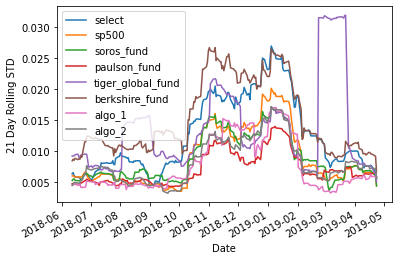

In [37]:
# Calculate rolling standard deviation
day_21_rolling_STD_df = select_combined_returns_df.rolling(window = 21).std()

# Plot rolling standard deviation
day_21_rolling_STD_df.plot(xlabel = "Date", ylabel = "21 Day Rolling STD")

### Calculate and plot the correlation

In [38]:
# Calculate and plot the correlation

select_correlation = select_combined_returns_df.corr()

print(f"Correlation Matrix:\n {select_correlation}")

Correlation Matrix:
                      select     sp500  soros_fund  paulson_fund  \
select             1.000000  0.871875    0.733250      0.644210   
sp500              0.871875  1.000000    0.876981      0.766680   
soros_fund         0.733250  0.876981    1.000000      0.791962   
paulson_fund       0.644210  0.766680    0.791962      1.000000   
tiger_global_fund  0.391972  0.481030    0.478627      0.485375   
berkshire_fund     0.801158  0.852303    0.816675      0.650758   
algo_1             0.261471  0.289358    0.337826      0.361301   
algo_2             0.739936  0.875721    0.862846      0.783656   

                   tiger_global_fund  berkshire_fund    algo_1    algo_2  
select                      0.391972        0.801158  0.261471  0.739936  
sp500                       0.481030        0.852303  0.289358  0.875721  
soros_fund                  0.478627        0.816675  0.337826  0.862846  
paulson_fund                0.485375        0.650758  0.361301  0.783656  


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [39]:
# Calculate and plot Beta

select_covariance_select_fund = select_combined_returns_df["select"].cov(select_combined_returns_df["sp500"])
select_covariance_soros_fund = select_combined_returns_df["soros_fund"].cov(select_combined_returns_df["sp500"])
select_covariance_paulson_fund = select_combined_returns_df["paulson_fund"].cov(select_combined_returns_df["sp500"])
select_covariance_tiger_global_fund = select_combined_returns_df["tiger_global_fund"].cov(select_combined_returns_df["sp500"])
select_covariance_berkshire_fund = select_combined_returns_df["berkshire_fund"].cov(select_combined_returns_df["sp500"])
select_covariance_algo_1 = select_combined_returns_df["algo_1"].cov(select_combined_returns_df["sp500"])
select_covariance_algo_2 = select_combined_returns_df["algo_2"].cov(select_combined_returns_df["sp500"])

print(f"Covariance of the Select Fund: {select_covariance_select_fund}")
print(f"Covariance of Soros Fund: {select_covariance_soros_fund}")
print(f"Covariance of Paulson Fund: {select_covariance_paulson_fund}")
print(f"Covariance of Tiger Global: {select_covariance_tiger_global_fund}")
print(f"Covariance of Berkshire Hathaway: {select_covariance_berkshire_fund}")
print(f"Covariance of Algo 1: {select_covariance_algo_1}")
print(f"Covariance of Algo 2: {select_covariance_algo_2}")

# SP500 covariance:
print()
select_variance = select_combined_returns_df["sp500"].var()
print(f"Variance for sp500: {variance}")
print()
#beta for all of the portfolios:

select_beta_select_fund = select_covariance_select_fund / select_variance
select_beta_soros_fund = select_covariance_soros_fund / select_variance
select_beta_paulson_fund = select_covariance_paulson_fund / select_variance
select_beta_tiger_global_fund = select_covariance_tiger_global_fund / select_variance
select_beta_berkshire_fund = select_covariance_berkshire_fund / select_variance
select_beta_algo_1 = select_covariance_algo_1 / select_variance
select_beta_algo_2 = select_covariance_algo_2 / select_variance

print(f"Beta of Select Fund: {select_beta_select_fund}")
print(f"Beta of Soros Fund: {select_beta_soros_fund}")
print(f"Beta of Paulson Fund: {select_beta_paulson_fund}")
print(f"Beta of Tiger Global Fund: {select_beta_tiger_global_fund}")
print(f"Beta of Berkshire Hathaway: {select_beta_berkshire_fund}")
print(f"Beta of Algo 1: {select_beta_algo_1}")
print(f"Beta of Algo 2: {select_beta_algo_2}")

# Portfolio / Beta
portfolio = ["Soros Fund", "Paulson Fund", "Tiger Global Fund", "Berkshire Hathaway", "Algo 1" "Algo 2"]
beta = [select_beta_soros_fund, select_beta_paulson_fund, select_beta_paulson_fund, select_beta_tiger_global_fund, select_beta_berkshire_fund, select_beta_algo_1, select_beta_algo_2]

#plt.figure(figsize = (10, 5))
#plt.bar(portfolio, beta)
#plt.xlabel("Portfolio")
#plt.ylabel("Beta")
#plt.title("Portfolio Beta")
#plt.show()

# Plot the beta for all data sets:
select_portfolio = ["Select"]

Covariance of the Select Fund: 0.00011126340361673004
Covariance of Soros Fund: 7.761473618592386e-05
Covariance of Paulson Fund: 5.4000885778888475e-05
Covariance of Tiger Global: 6.749162618669418e-05
Covariance of Berkshire Hathaway: 0.00012710419597686091
Covariance of Algo 1: 2.3344034698704812e-05
Covariance of Algo 2: 7.374156856642586e-05

Variance for sp500: 0.020865137941717918

Beta of Select Fund: 1.2127120076458702
Beta of Soros Fund: 0.8459594033916769
Beta of Paulson Fund: 0.5885809752248508
Beta of Tiger Global Fund: 0.7356228807640348
Beta of Berkshire Hathaway: 1.3853682313573936
Beta of Algo 1: 0.2544375802446189
Beta of Algo 2: 0.8037439333709113


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))
print(f"Sharpe Ratio of the entire Portfolio:\n{sharpe_ratios}")

Sharpe Ratio of the entire Portfolio:
sp500                0.648267
Soros_Fund           0.356417
Paulson_Fund        -0.483570
Tiger_Global_Fund   -0.121060
Berkshire_Fund       0.621810
Algo1                1.378648
Algo2                0.501364
dtype: float64


In [41]:
portfolio = ["Soros Fund", "Paulson Fund", "Tiger Global Fund", "Berkshire Hathaway", "Algo 1" "Algo 2"]
beta = [select_sharpe_ratios[0], select_sharpe_ratios[1], select_sharpe_ratios[2], select_sharpe_ratios[3], select_sharpe_ratios[4], select_sharpe_ratios[5], select_sharpe_ratios[6]
        
plt.figure(figsize = (10, 5))
plt.bar(portfolio, )
plt.grid()
plt.xlabel("Portfolio")
plt.ylabel("Sharpe Ratio")
plt.title("Sharpe Ratio of the entire Portfolio")
plt.show

SyntaxError: invalid syntax (<ipython-input-41-09bbef29cb1d>, line 4)

### How does your portfolio do?

Write your answer here!

# Algo 1 is clearly the best preforming fund overall. Almost doubling Hathaway !!!